In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import numpy as np


In [4]:
df= pd.read_csv("0430_0.022V_2T_f4+ -1.2mbar_0.6W.csv")
df.columns =["time","polarization"]
df["smoothed"] = savgol_filter(df["polarization"], 60, 3)

max_index = df["smoothed"].idxmax()
max_pol= df["smoothed"][max_index]
target_value=max_pol/np.e 
relaxation_data = df.iloc[max_index:]
relaxation_data=relaxation_data[relaxation_data["smoothed"]>target_value]
max_time=df["time"][max_index]
relaxation_time= relaxation_data["time"].iloc[-1]-max_time
print(f"Relaxation time: {relaxation_time} seconds")


Relaxation time: 613.4062788486481 seconds


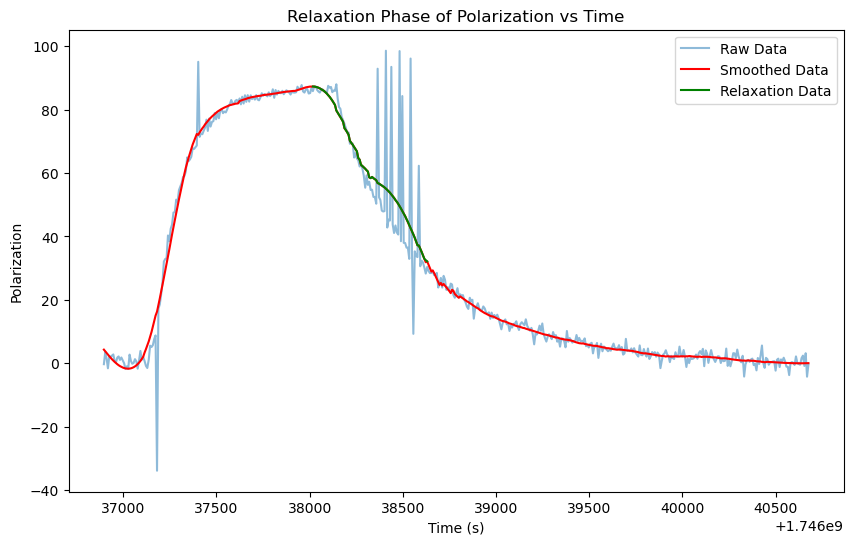

In [3]:
plt.figure(figsize=(10,6))
plt.plot(df["time"], df["polarization"], label="Raw Data", alpha=0.5)
plt.plot(df["time"], df["smoothed"], label="Smoothed Data", color='red')
plt.xlabel("Time (s)")
plt.ylabel("Polarization")
plt.title("Polarization vs Time with Smoothing")
plt.legend()
plt.plot(relaxation_data["time"], relaxation_data["smoothed"], label="Relaxation Data", color='green')
plt.xlabel("Time (s)")
plt.ylabel("Polarization")      
plt.title("Relaxation Phase of Polarization vs Time")
plt.legend()
plt.show()

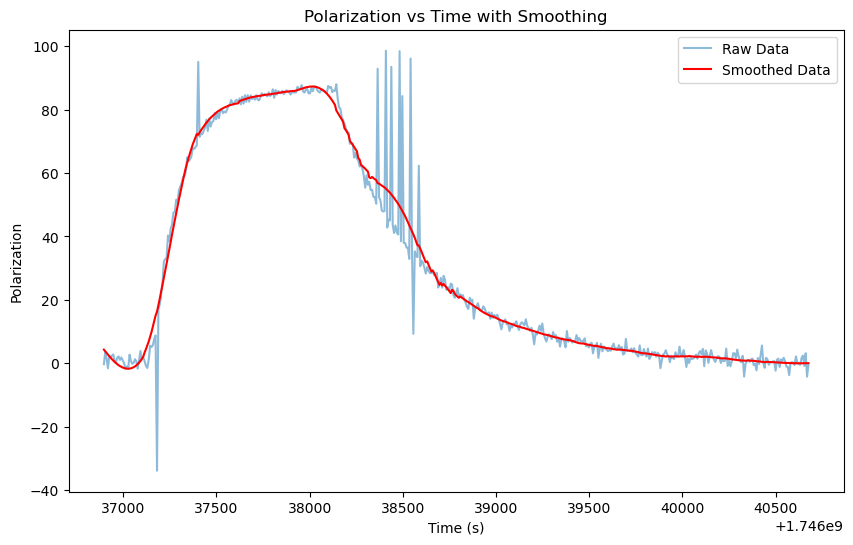

In [18]:
plt.figure(figsize=(10,6))
plt.plot(df["time"], df["polarization"], label="Raw Data", alpha=0.5)
plt.plot(df["time"], df["smoothed"], label="Smoothed Data", color='red')
plt.xlabel("Time (s)")
plt.ylabel("Polarization")
plt.title("Polarization vs Time with Smoothing")
plt.legend()
plt.show()